# Customer attrition, customer turnover, or customer defection: 
they all refer to the loss of clients or customers, ie, churn. This can be due to voluntary reasons (by choice) or involuntary reasons (for example relocation). Here, we will explore 8 predictive analytic models to assess customers’ propensity or risk to churn. These models can generate a list of customers who are most vulnerable to churn, so that business can work towards retaining them.

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, fbeta_score
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve

In [6]:
font = {'family': 'serif',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }

In [7]:
plt.style.use('dark_background')

In [70]:
df = pd.read_csv('Telco-Customer-Churn.csv')

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.shape

(7043, 21)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Total Charges must be of type float, but its of type is object. So some invalid value must be there.**

In [71]:
df[df['TotalCharges'].str.replace('.','').str.isdigit()==False]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [72]:
df[df['TotalCharges'].str.replace('.','').str.isdigit()==False]['TotalCharges'].unique()

array([' '], dtype=object)

Replacing blank spaces in Total Charges

In [73]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)
df = df.dropna()
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [16]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [74]:
df['Churn'] = [1 if x=='Yes' else 0 for x in df['Churn']]

In [75]:
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [76]:
X, y = df.drop('Churn',axis=1), df[['Churn']]

In [18]:
df.shape

(7032, 21)

In [57]:
churn = df['Churn'].value_counts().tolist()

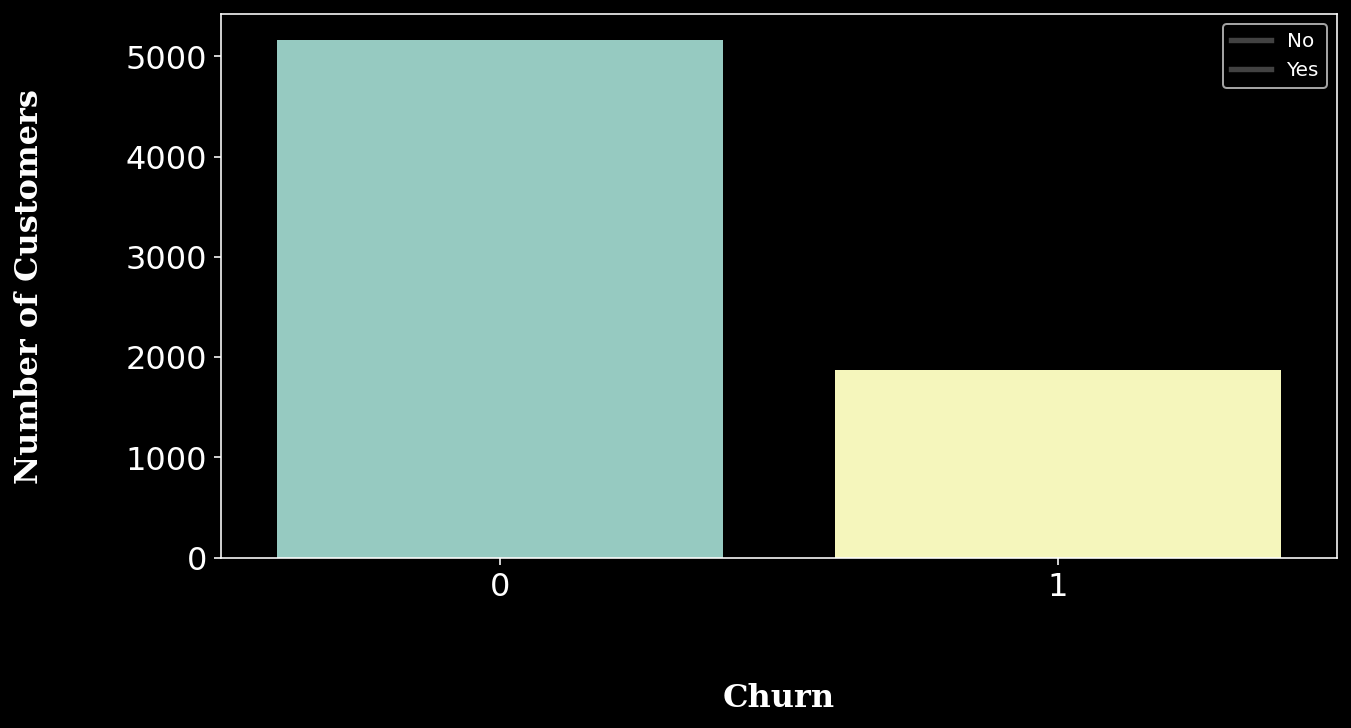

In [64]:
plt.figure(figsize=(10,5))
plt.xlabel('Churn',fontdict=font,labelpad=40)
plt.ylabel('Number of Customers',fontdict=font,labelpad=40)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.barplot(x=df['Churn'].unique(), y=churn)
plt.legend(['No','Yes'])
plt.show()

In [59]:
per_churn = (df['Churn'].value_counts().tolist()[1]/df.shape[0])*100

In [60]:
per_churn

26.578498293515356

# p - value

A p value is used in hypothesis testing to help you support or reject the null hypothesis. The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.

P values are expressed as decimals although it may be easier to understand what they are if you convert them to a percentage. For example, a p value of 0.0254 is 2.54%. This means there is a 2.54% chance your results could be random (i.e. happened by chance). That’s pretty tiny. On the other hand, a large p-value of .9(90%) means your results have a 90% probability of being completely random and not due to anything in your experiment. Therefore, the smaller the p-value, the more important (“significant“) your results.

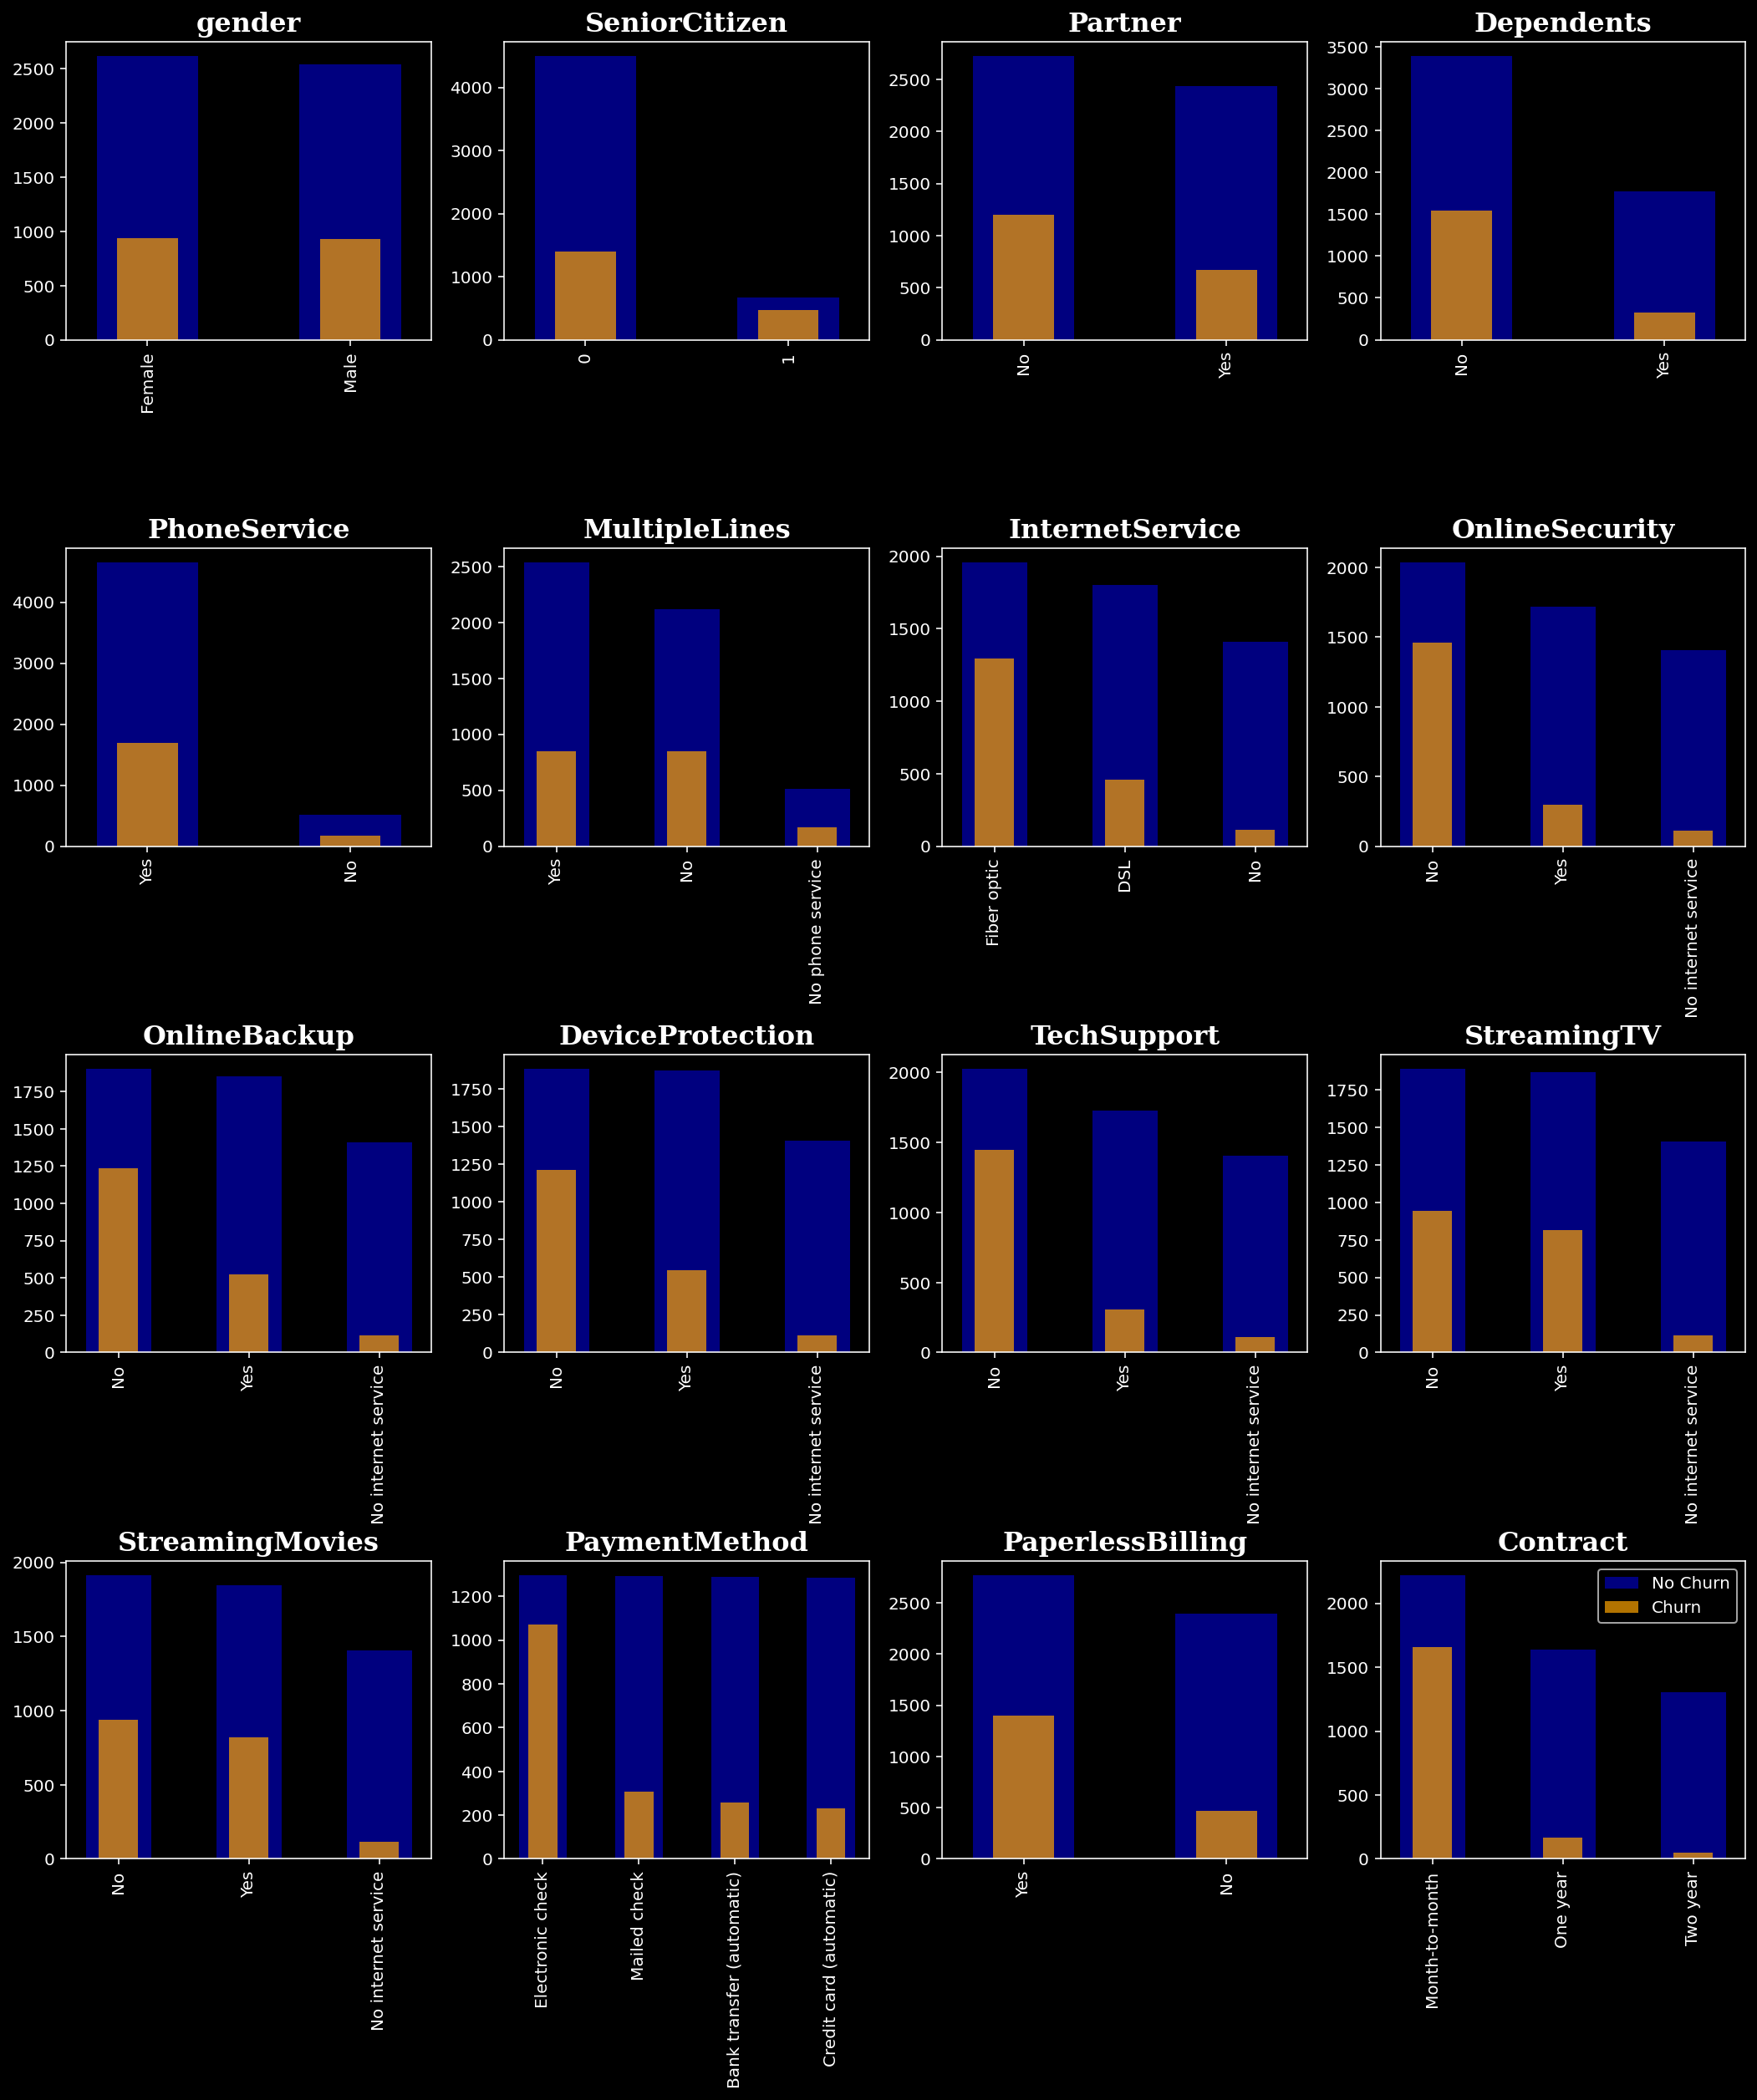

In [62]:
categorical_features = [ 'gender', 'SeniorCitizen', 'Partner',
 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod',
 'PaperlessBilling', 'Contract' ]
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 20) )
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1: 
        row += 1
    col = i % COLS
    df[df.Churn==0][categorical_feature].value_counts().plot(kind='bar', width=.5, ax=ax[row, col], color='blue', alpha=0.5).set_title(categorical_feature, fontdict=font)
    df[df.Churn==1][categorical_feature].value_counts().plot(kind='bar', width=.3, ax=ax[row, col], color='orange', alpha=0.7).set_title(categorical_feature, fontdict=font)
    plt.legend(['No Churn', 'Churn'])
    fig.subplots_adjust(hspace=0.7)

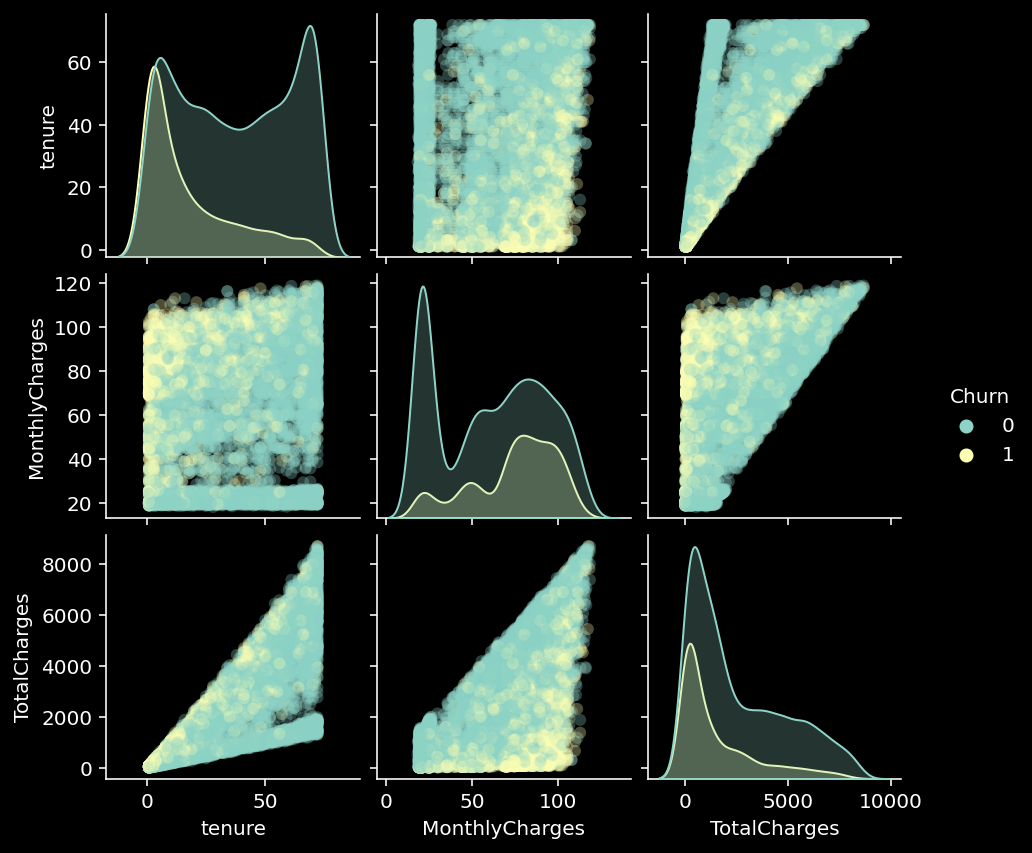

In [65]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1)
plt.show()

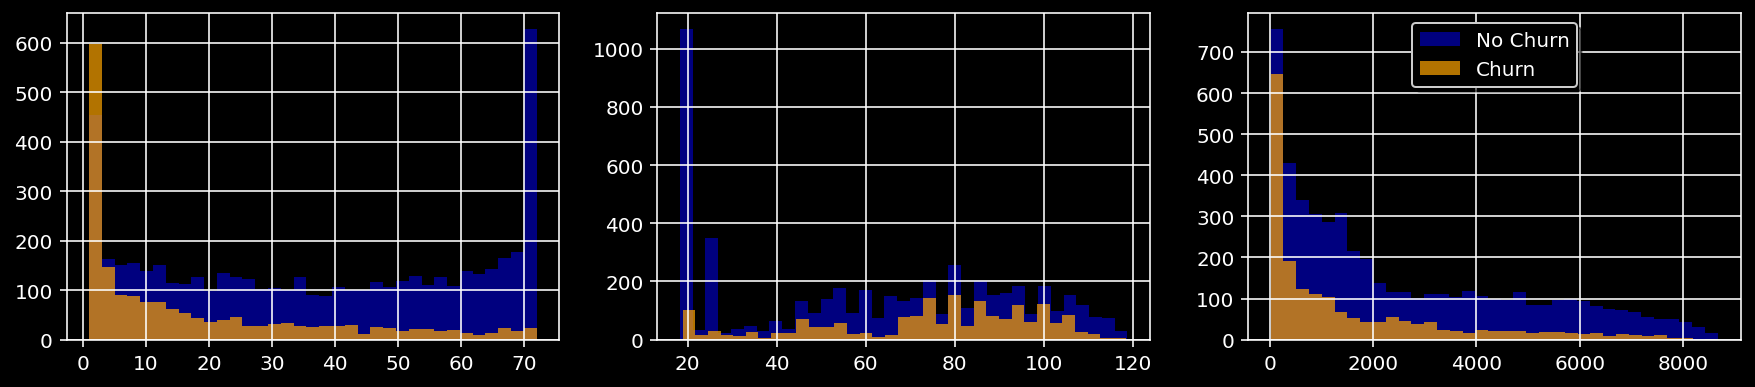

In [66]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for i in range(3):
    df[df.Churn == 0][num_cols[i]].hist(bins=35, color='blue', alpha=0.5, ax=ax[i])
    df[df.Churn == 1][num_cols[i]].hist(bins=35, color='orange', alpha=0.7, ax=ax[i])
    plt.legend(['No Churn', 'Churn'], shadow=True, loc=9)

In [67]:
# change MonthlyCharges to categorical column
def monthlycharges_split(df) : 
    if df['MonthlyCharges'] <= 30 :
        return '0–30'
    elif (df['MonthlyCharges'] > 30) & (df['MonthlyCharges'] <= 70 ):
        return '30–70'
    elif (df['MonthlyCharges'] > 70) & (df['MonthlyCharges'] <= 99 ):
        return '70–99'
    elif df['MonthlyCharges'] > 99 :
        return '99plus'
df['monthlycharges_group'] = df.apply(lambda df:monthlycharges_split(df), axis = 1)
# change TotalCharges to categorical column
def totalcharges_split(df) : 
    if df['TotalCharges'] <= 2000 :
        return '0–2k'
    elif (df['TotalCharges'] > 2000) & (df['TotalCharges'] <= 4000 ):
        return '2k-4k'
    elif (df['TotalCharges'] > 4000) & (df['TotalCharges'] <= 6000) :
        return '4k-6k'
    elif df['TotalCharges'] > 6000 :
        return '6kplus'
df['totalcharges_group'] = df.apply(lambda df:totalcharges_split(df), axis = 1)
# change Tenure to categorical column
def tenure_split(df) : 
    if df['tenure'] <= 20 :
        return '0–20'
    elif (df['tenure'] > 20) & (df['tenure'] <= 40 ):
        return '20–40'
    elif (df['tenure'] > 40) & (df['tenure'] <= 60) :
        return '40–60'
    elif df['tenure'] > 60 :
        return '60plus'
df['tenure_group'] = df.apply(lambda df:tenure_split(df), axis = 1)

In [68]:
# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=71)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)
def model_report(model_name, model):
    print('\nSearch for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data')
    model.fit(X_train, y_train)
    optimal_th = 0.5 # start with default threshold value

    for i in range(0,3):
        score_list = []
        print('\nLooping decimal place', i+1) 
        th_list = [np.linspace(optimal_th-0.4999, optimal_th+0.4999, 11), 
        np.linspace(optimal_th-0.1, optimal_th+0.1, 21), 
        np.linspace(optimal_th-0.01, optimal_th+0.01, 21)]
    for th in th_list[i]:
        y_pred = (model.predict_proba(X_test)[:,1] >= th)
        f1scor = f1_score(y_test, y_pred)
        score_list.append(f1scor)
        print('{:.3f}->{:.4f}'.format(th, f1scor), end=', ') 
    optimal_th = float(th_list[i][score_list.index(max(score_list))])
    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    print('optimal threshold = {:.3f}'.format(optimal_th))
    print(model_name, 'accuracy score is')
    print('Training: {:.2f}%'.format(100*model.score(X_train, y_train))) # score uses accuracy
    print('Test set: {:.2f}%'.format(100*model.score(X_test, y_test)))
    y_pred = (model.predict_proba(X_test)[:,1] >= 0.25)
    print('\nAdjust threshold to 0.25:')
    print('Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}'.format(
    precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    y_pred = model.predict(X_test)
    print('\nDefault threshold of 0.50:')
    print('Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}'.format(
    precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    y_pred = (model.predict_proba(X_test)[:,1] >= 0.75)
    print('\nAdjust threshold to 0.75:')
    print('Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}'.format(
    precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    y_pred = (model.predict_proba(X_test)[:,1] >= optimal_th)
    print('\nOptimal threshold {:.3f}'.format(optimal_th))
    print('Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}'.format(
    precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    global model_f1, model_auc, model_ll, model_roc_auc
    model_f1 = f1_score(y_test, y_pred)
    y_pred = model.predict_proba(X_test)
    model_ll = log_loss(y_test, y_pred)
    print(model_name, 'Log-loss: {:.4f}'.format(model_ll))
    y_pred = model.predict(X_test)
    model_roc_auc = roc_auc_score(y_test, y_pred)
    print(model_name, 'roc_auc_score: {:.4f}'.format(model_roc_auc)) 
    y_pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    model_auc = auc(fpr, tpr)
    print(model_name, 'AUC: {:.4f}'.format(model_auc))
    # plot the ROC curve
    plt.figure(figsize = [6,6])
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % model_auc)
    plt.plot([0, 1], [0, 1],'r — ')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    # plt.savefig('roc_auc_score')
    plt.show()

    return
# initialise lists to collect the results to plot later
model_list = []
f1_list = []
auc_list = []
ll_list = []
roc_auc_list = []
time_list = []

X_train (5634, 20)
y_train (5634, 1)
X_test (1409, 20)
y_test (1409, 1)


In [77]:
print('\n”””””” LogisticRegression “”””””')
print('\nSearch for optimal hyperparameter C in LogisticRegresssion, vary C from 0.001 to 1000, using KFold(5) Cross Validation on train data')
kf = KFold(n_splits=5, random_state=21, shuffle=True) 
score_list = []
c_list = 10**np.linspace(-3,3,200)
for c in c_list:
    logit = LogisticRegression(C = c)
    print(logit)
    p = cross_val_score(estimator=logit, X=X_train, y=y_train, cv=kf, scoring='f1')
    print(p)
    cvs = p.mean()
    score_list.append(cvs)
    print('{:.4f}'.format(cvs), end=', ') # 4 decimal pl
print('optimal cv F1 score = {:.4f}'.format(max(score_list)))
optimal_c = float(c_list[score_list.index(max(score_list))])
print('optimal value of C = {:.3f}'.format(optimal_c))
time1 = time.time()
logit = LogisticRegression(C = optimal_c)
model_report('LogisticRegression', logit)
model_list.append('LogisticRegression')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)
time_list.append(time.time() - time1)


”””””” LogisticRegression “”””””

Search for optimal hyperparameter C in LogisticRegresssion, vary C from 0.001 to 1000, using KFold(5) Cross Validation on train data
LogisticRegression(C=0.001)


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\asus\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asus\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_logistic.py", line 1138, in fit
    X, y = self._validate_data(
  File "C:\Users\asus\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\asus\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "C:\Users\asus\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "C:\Users\asus\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: '4737-HOBAX'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\asus\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asus\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_logistic.py", line 1138, in fit
    X, y = self._validate_data(
  File "C:\Users\asus\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\asus\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "C:\Users\asus\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "C:\Users\asus\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: '4422-QVIJA'


In [32]:
cross_val_score?

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

scoring : str or callable, default=None

In [33]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

# Deep Learning Model

In [112]:
#numerical variables

num = list(df.select_dtypes(include=['int64','float64']).keys())

#categorical variables

cat = list(df.select_dtypes(include='O').keys())

print(cat)

print(num)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [113]:
dfn = df.copy()

In [114]:
# value_counts of the categorical columns
for i in cat:
    print(df[i].value_counts())
# as we see that there is extra categories which we have to convert it into No.
dfn.MultipleLines = dfn.MultipleLines.replace('No phone service','No')
dfn.OnlineSecurity = dfn.OnlineSecurity.replace('No internet service','No')
dfn.OnlineBackup = dfn.OnlineBackup.replace('No internet service','No')
dfn.DeviceProtection = dfn.DeviceProtection.replace('No internet service','No')
dfn.TechSupport = dfn.TechSupport.replace('No internet service','No')
dfn.StreamingTV = dfn.StreamingTV.replace('No internet service','No')
dfn.StreamingMovies = dfn.StreamingMovies.replace('No internet service','No')

Male      3549
Female    3483
Name: gender, dtype: int64
No     3639
Yes    3393
Name: Partner, dtype: int64
No     4933
Yes    2099
Name: Dependents, dtype: int64
Yes    6352
No      680
Name: PhoneService, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV

In [115]:
# we have to handel this all categorical variables
# there are mainly Yes/No features in most of the columns
# we will convert Yes = 1 and No = 0
for i in cat:
    dfn[i] = dfn[i].replace('Yes',1)
    dfn[i] = dfn[i].replace('No',0)

In [116]:
# we will convert male = 1 and female = 0
dfn.gender = dfn.gender.replace('Male',1)
dfn.gender = dfn.gender.replace('Female',0)

In [117]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dfn['InternetService'] = label.fit_transform(dfn['InternetService'])
dfn['Contract'] = label.fit_transform(dfn['Contract'])
dfn['PaymentMethod'] = label.fit_transform(dfn['PaymentMethod'])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [126]:
scale_cols = ['tenure','MonthlyCharges','TotalCharges']
# now we scling all the data 
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
dfn[scale_cols] = scale.fit_transform(dfn[scale_cols])

In [127]:
# independent and dependent variables
x = dfn.drop('Churn',axis=1)
y = dfn['Churn']

In [128]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)
print(xtrain.shape)
print(xtest.shape)

(5625, 19)
(1407, 19)


In [131]:
import tensorflow as tf
#import keras 
from tensorflow import keras

In [132]:
# define sequential model
model = keras.Sequential([
    # input layer
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    # we use sigmoid for binary output
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [133]:
# time for compilation of neural net.
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
# now we fit our model to training data
model.fit(xtrain,ytrain,epochs=100)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).